In [185]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [186]:
# load dataset
df = pd.read_csv("bank-full.csv")
df['y'].replace(['no', 'yes' , 'unkown'],[0, 1,-1], inplace=True)
df['housing'].replace(['no', 'yes' , 'unkown'],[0, 1,-1], inplace=True)
df['loan'].replace(['no', 'yes' , 'unkown'],[0, 1,-1], inplace=True)
df['job'].replace(["admin.","unknown","unemployed","management","housemaid","entrepreneur"
,"student","blue-collar","self-employed","retired","technician","services"],
[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)
df['marital'].replace(["married","divorced","single"],[1,2,3],inplace=True)
df['education'].replace(["unknown","secondary","primary","tertiary"],[0,1,2,3],inplace=True)
df['default'].replace(['no', 'yes' , 'unkown'],[0, 1,-1], inplace=True)
df['contact'].replace(["unknown","telephone","cellular"],[0, 1,2], inplace=True)
df['poutcome'].replace(["unknown","other","failure","success"],[0,1,2,3],inplace=True)
df=df.drop(['month'], axis = 1)

print(df.head)


<bound method NDFrame.head of        age  job  marital  education  ...  pdays  previous  poutcome  y
0       58    4        1          3  ...     -1         0         0  0
1       44   11        3          1  ...     -1         0         0  0
2       33    6        1          1  ...     -1         0         0  0
3       47    8        1          0  ...     -1         0         0  0
4       33    2        3          0  ...     -1         0         0  0
...    ...  ...      ...        ...  ...    ...       ...       ... ..
45206   51   11        1          3  ...     -1         0         0  1
45207   71   10        2          2  ...     -1         0         0  1
45208   72   10        1          1  ...    184         3         3  1
45209   57    8        1          1  ...     -1         0         0  0
45210   37    6        1          1  ...    188        11         1  0

[45211 rows x 16 columns]>


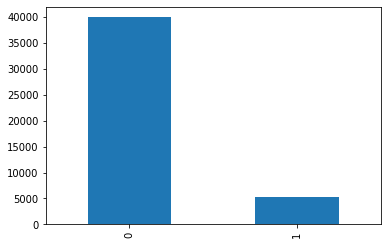

In [187]:
df['y'].value_counts(normalize=True)

df['y'].value_counts().plot(kind='bar')

In [188]:

x=df.iloc[:,[0,1,2,3,4,5,6,7,11]].values
y = df['y']
print(x)


[[58  4  1 ...  1  0  1]
 [44 11  3 ...  1  0  1]
 [33  6  1 ...  1  1  1]
 ...
 [72 10  1 ...  0  0  5]
 [57  8  1 ...  0  0  4]
 [37  6  1 ...  0  0  2]]


In [189]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain , ytest = train_test_split(x,y,test_size=0.5,random_state=0)

from sklearn.preprocessing import StandardScaler

df["age"] = pd.to_numeric(df["age"], downcast="float")
df["balance"] = pd.to_numeric(df["balance"], downcast="float")

df["job"] = pd.to_numeric(df["job"], downcast="float")
df["marital"] = pd.to_numeric(df["marital"], downcast="float")
df["education"] = pd.to_numeric(df["education"], downcast="float")
df["default"] = pd.to_numeric(df["default"], downcast="float")
df["housing"] = pd.to_numeric(df["housing"], downcast="float")

df["loan"] = pd.to_numeric(df["loan"], downcast="float")
df["contact"] = pd.to_numeric(df["contact"], downcast="float")
df["duration"] = pd.to_numeric(df["duration"], downcast="float")



In [190]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)
  
print (xtrain[0:, :])


[[-1.12344321 -0.86061067  1.48384308 ...  0.89597731 -0.43953477
  -0.56795905]
 [ 0.00834888  0.27035971 -0.77200956 ...  0.89597731 -0.43953477
  -0.24396182]
 [ 0.10266488  0.27035971 -0.77200956 ...  0.89597731 -0.43953477
  -0.24396182]
 ...
 [-0.55754717 -0.86061067 -0.77200956 ... -1.11609969 -0.43953477
  -0.24396182]
 [ 2.74351308  0.8358449  -0.77200956 ... -1.11609969 -0.43953477
  -0.24396182]
 [ 0.47992891  0.27035971  1.48384308 ...  0.89597731 -0.43953477
   0.40403265]]


In [191]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)
y_pred = classifier.predict(xtest)


In [192]:
from sklearn.metrics import confusion_matrix
print ("Confusion Matrix : \n", confusion_matrix(ytest, y_pred))
#True Pos     False Pos
#False Neg    True Neg

Confusion Matrix : 
 [[19962     6]
 [ 2637     1]]


In [193]:
from sklearn.metrics import precision_score, f1_score, classification_report
print("Report Before Balancing Dataset ")
print("Recall = ",recall_score(ytest, y_pred))
print("precision = ",precision_score(ytest, y_pred))
print("F1 Score = ",f1_score(ytest, y_pred))
print("Accuracy = ",accuracy_score(ytest , y_pred))

Report Before Balancing Dataset 
Recall =  0.0003790750568612585
precision =  0.14285714285714285
F1 Score =  0.0007561436672967863
Accuracy =  0.8830841369547907


0    39922
1    36548
Name: y, dtype: int64


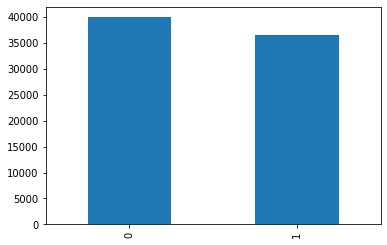

In [194]:
df_majority = df[df.y==0]
df_minority = df[df.y==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,      # sample with replacement
                                 n_samples=36548)   # to match majority class
                              
 
#Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
print(df_upsampled['y'].value_counts())
df_upsampled['y'].value_counts().plot(kind='bar')

In [195]:
x_balanced = df_upsampled.drop('y', axis=1)
y_balanced = df_upsampled['y']


In [196]:
xtrain2 , xtest2, ytrain2 , ytest2 = train_test_split(x_balanced,y_balanced,test_size=0.5,random_state=0)
classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(xtrain2, ytrain2)
y_pred2 = classifier2.predict(xtest2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [197]:
from sklearn.metrics import confusion_matrix
print ("Confusion Matrix : \n", confusion_matrix(ytest2, y_pred2))
#True Pos     False Pos
#False Neg    True Neg

Confusion Matrix : 
 [[15899  3959]
 [ 4709 13668]]


In [198]:
print("Report Before Balancing Dataset ")
print("Recall = ",recall_score(ytest2, y_pred2))
print("precision = ",precision_score(ytest2, y_pred2))
print("F1 Score = ",f1_score(ytest2, y_pred2))
print("Accuracy = ",accuracy_score(ytest2 , y_pred2))

Report Before Balancing Dataset 
Recall =  0.7437557816836263
precision =  0.775401372893856
F1 Score =  0.7592489723364071
Accuracy =  0.773296717667059
